In [4]:
# CREATING SAMPLES FOR TASKS 1-4
printf <- function(...) cat(sprintf(...))

n <- ID <- 14 #ID 014



     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-227.9985   -1.4790    0.0556   -2.3175    1.5474   78.6705 

[1] "X dataset: "


Xk_vec
 -227.998467777574  -97.9111434346712  -26.2470574231768  -24.0164913138301 
                 1                  1                  1                  1 
 -11.2834959724366  -4.47175258429034  -4.15506806097523  -3.57471229784616 
                 1                  1                  1                  1 
 -3.08070285691342  -2.83599167222821  -2.39352641787558  -2.33674681677101 
                 1                  1                  1                  1 
 -2.22361931933421  -2.20559291339759  -2.18409632225978  -2.07251746099744 
                 1                  1                  1                  1 
 -2.04292866483512  -1.91564674937401  -1.89807561213872   -1.8549396457366 
                 1                  1                  1                  1 
 -1.74710555347862  -1.58420068291059   -1.4941038973351  -1.48983595345611 
                 1                  1                  1                  1 
 -1.48866909240155  -1.47571844174655  -1.46737923321533  -1.41717834

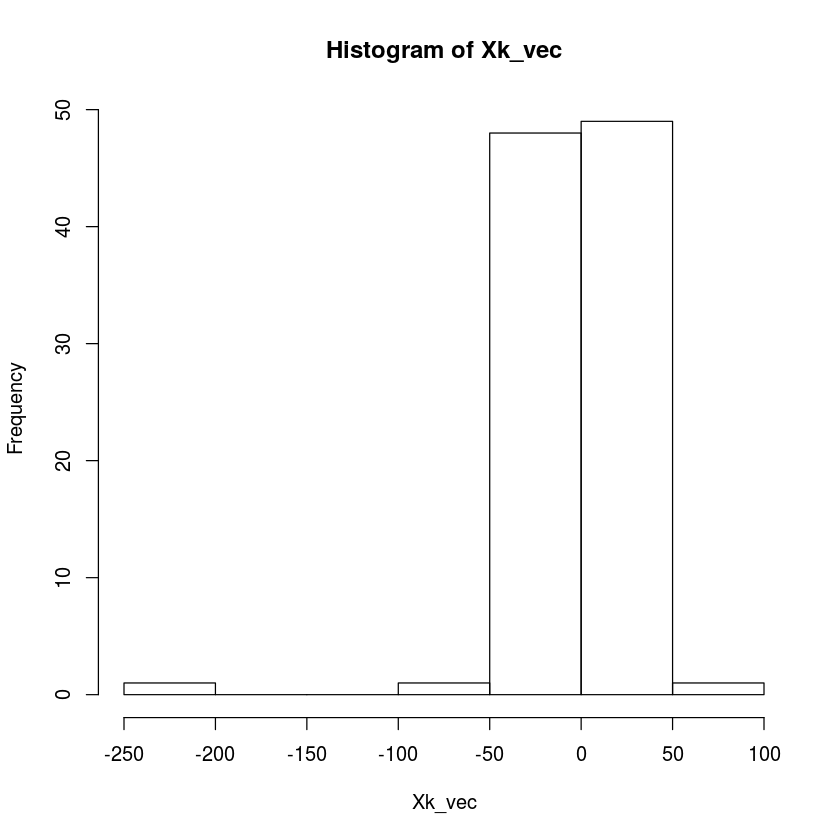

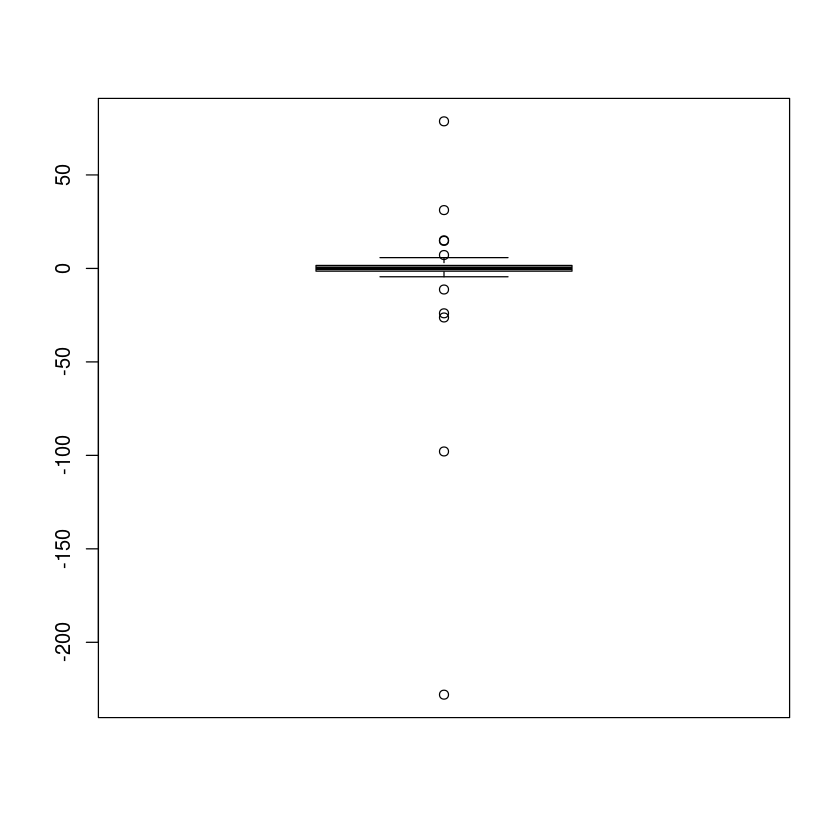

In [5]:
# Generating X samples
Xk_vec <- c()

for(k in 1:100) {
    A_k <- k * log(k^2 * n + pi)
    Xk_vec[k] <- A_k - floor(A_k) 
}

# generate set of [X1,... X100] 
Xk_vec <- 1/qnorm(Xk_vec[1:100])

summary(Xk_vec)
hist(Xk_vec)

print("X dataset: ")
table(Xk_vec)
boxplot(Xk_vec)


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-155.0464   -2.1842   -0.5485   -2.9732    1.8985   23.4041 

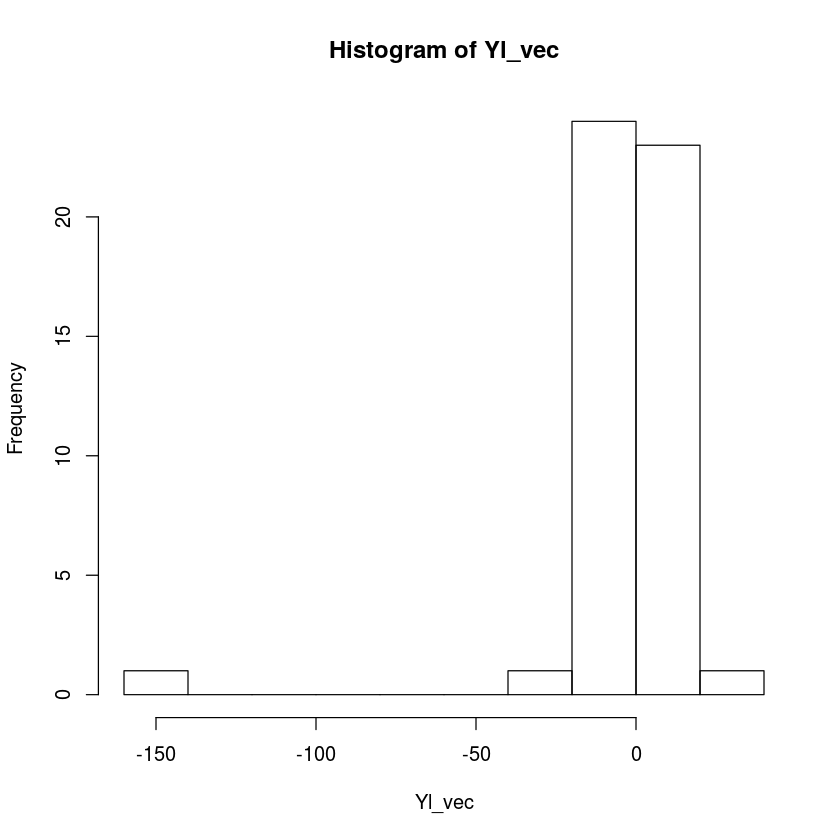

[1] "Y dataset: "


Yl_vec
 -155.046360331801  -21.0993533060432  -8.48474878590284  -6.09422713899914 
                 1                  1                  1                  1 
 -4.77012450103395   -4.1162763442846  -4.08159483080389  -3.83145797809074 
                 1                  1                  1                  1 
 -3.62345549499283  -3.09087822837695  -2.93369920719864  -2.80255717548457 
                 1                  1                  1                  1 
 -2.30268379982718  -1.82862630132305  -1.64589282558468  -1.60046419182366 
                 1                  1                  1                  1 
 -1.52808908528557  -1.20141626830396 -0.987353132229689 -0.956767296545499 
                 1                  1                  1                  1 
-0.888292251166141 -0.885956847153193 -0.852255172891921 -0.827925146940542 
                 1                  1                  1                  1 
-0.610403457191467 -0.486531287534755   0.54989225131146  0.562053445

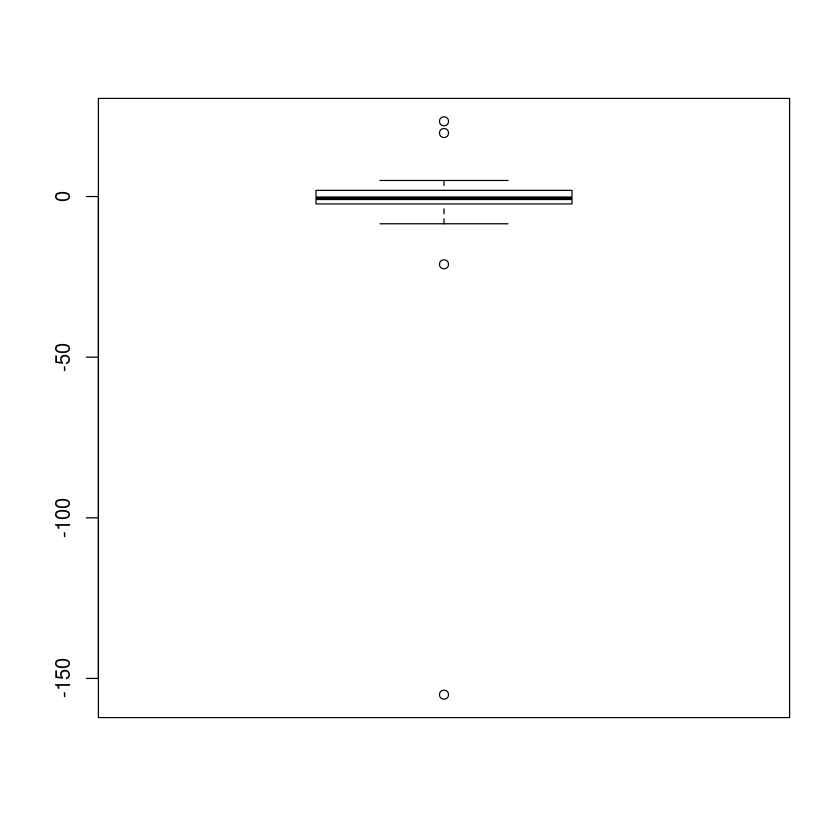

In [6]:
# Generating Y samples
Yl_vec <- c()

for(l in 101:150) {
    A_l <- l * log(l^2 * n + pi)
    Yl_vec[l-100] <- A_l - floor(A_l)
}

# generate set of [Y1,... Y50] 
Yl_vec <- 1/qnorm(Yl_vec[1:50])

summary(Yl_vec)
hist(Yl_vec)
boxplot(Yl_vec)

print("Y dataset: ")
table(Yl_vec)


In [30]:
#          Problem 1: H 0 : μ 1 = 0 vs. H 1 : μ < 0;
# We have one-sided composed hypothesis => we can use one-sided test (any value of experimental Mean > 0 will make us sure that 
# H0 should be accepted ). As we do not posses variance value => wa can apply Student distribution, 
# which does not use it. (t-test)

# As our H_1 is of form "less then something",- general form of rejection region is 
# reasonable to take of kind C:={x є R| x < = c }, where "c" is some scalar value
# depending of our test set data


t.test(Xk_vec, y = NULL, alternative = "less", mu = 0, conf.level = 0.95)




	One Sample t-test

data:  Xk_vec
t = -0.86874, df = 99, p-value = 0.1935
alternative hypothesis: true mean is less than 0
95 percent confidence interval:
     -Inf 2.111849
sample estimates:
mean of x 
-2.317517 


In [63]:
#As we observe - we have value inside the confidence interval -> keep H_0

# This position is allso approved by p-value considering: while alpha equal 0.05 the "minimum possible alpha" for such a 
# sample is way bigger than 5% => we should keep H_0.

In [16]:
#                                     Problem 2
# as we have known wariance thus we can avoid Student's ditsribution testing and calculate it directly from Normal 
# distribution assumption.

# As we have two-sided assumption therefore form of our rejection region will be z < Z_1 or z > Z_2, where Z_2 > Z_1
# Z_1 - percentile of level 0.025, Z_2 - percentile of level 0.975 

Mu0 = 0
alpha = .05
Xbar <- mean(Xk_vec)
Ybar <- mean(Yl_vec)
nX <- 100
nY <-50
# from the conditions we know that Y and X share the same variance = 2
variance = 2

zX <- (Xbar - 0) / (sqrt(variance/nX))
zY <- (Ybar - 0) / (sqrt(variance/nY))

zStat <- zX - zY
printf("Statistics %f\n", zStat)

Z_1 <- qnorm( alpha/2 )
Z_2 <- qnorm( 1 - (alpha/2) )
printf("Left_confidence_interval_border %f\n", Z_1)
printf("Right_confidence_interval_border %f\n", Z_2)
if (zStat < Z_2 && zStat> Z_1)  printf("H0 should be preserved\n") else    printf("H0 should be negated\n")



Statistics -1.521144
Left_confidence_interval_border -1.959964
Right_confidence_interval_border 1.959964
H0 should be preserved


In [19]:
# as we can see obtained statistics value lays inside confidence interval, not rejection region => 
# therefore we should preserve H_0 hypothesis


# check our assumption by generalisinf approach and calculating p-value:

pVal <- 2*pnorm(zStat)
printf("pVal = %f\n", pVal)
printf("significance level = %f\n", alpha)

if (pVal > alpha) printf("Left H_0, error risk is too hight\n") else ("Reject H_0, risk is low\n") 

    


pVal = 0.128224
significance level = 0.050000
Left H_0, error risk is too hight


In [20]:

# perform additional check with t-test as an automate approximation
test2 <- t.test(Xk_vec,Yl_vec, alternative = "two.sided", var.equal=TRUE, conf.level = 0.95)


	Two Sample t-test

data:  Xk_vec and Yl_vec
t = 0.1488, df = 148, p-value = 0.8819
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -8.052560  9.363997
sample estimates:
mean of x mean of y 
-2.317517 -2.973235 


In [ ]:
# As we can observe our confidence interval is about [-8, 9] 
# p-value is large therefore facing large probalility of first type error we sholud ACCEPT H_0

In [67]:
#                                            Problem 3
# H_0 : varX = 1   H_1: varX != 1   Mu_1 = 0
# As variance has chi-squered distribution with n-1 degree of freedom we can apply f-test to get needed value

# our rejection region will be of a kind (VarX < F_1 or VarX > F_2), where true that F_1 < 1 < F_2 

comparing_const_vector <- rep(1, 100)
var(Xk_vec)
var.test(Xk_vec, comparing_const_vector, ratio = 1, conf.level = 0.95, alternative = "two.sided" )


[1] 26.67664


	F test to compare two variances

data:  Xk_vec and comparing_const_vector
F = Inf, num df = 99, denom df = 99, p-value < 2.2e-16
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 Inf Inf
sample estimates:
ratio of variances 
               Inf 


In [65]:
# as we see, p-value is reealy close to zero. Variance from our sample is huge -> definitely not 1. 
#Confidence interval is presmably everywhere
# we should reject our H_0 assumption because p-value is tiny.

In [28]:
#problem 4
# H_0 : varX = varY   H_1: varX > varY   MuX, MuY - unknown.
# As variance has chi-squered distribution with n-1 degree of freedom we can apply f-test to get needed value

# rejection region will be of a kind (X - Y > C, C є R)

var(Xk_vec)
var(Yl_vec)
var.test(Xk_vec, Yl_vec, ratio = 1, conf.level = 0.95, alternative = "greater" )

[1] 711.6433

[1] 517.3455


	F test to compare two variances

data:  Xk_vec and Yl_vec
F = 1.3756, num df = 99, denom df = 49, p-value = 0.1087
alternative hypothesis: true ratio of variances is greater than 1
95 percent confidence interval:
 0.8984768       Inf
sample estimates:
ratio of variances 
          1.375567 


In [68]:
# From this data we observe that ratio seems to be bigger than 1  (~1.3) but not enouth to
# overcome out significance level barrier.
# p-value is larger than our significance level -> leave H_0

In [69]:
#                                                   Problem 5

#
# Yk = a + b*xk + εk ,
#
x_gen <- function(k) {
    x = 10 * (1 + cos(k*n))
    return (x)
}

y_gen <- function(x, k) {
    y = sin(n+cos(k^2))+cos(n+sin(k^2)/k)*(1+sin(k^2)/k)*x
    return (y)
}

k = 1:50

x = x_gen(k)
print(x)
y = y_gen(x, k)
print(y)

#epsRandom <- function(q){rnorm(n=50, mean = 0, var = q)}

#x1 <- function(a)
#x3 <- function(sDev){rnorm(n = 50, mean = 0, sd = sDev)}

#HOW TO PUT A RANDOM VARIABLE AS DEPENDANT PARAMETER?
model <- lm(y ~ 1 + x + rnorm(n=50, mean=0, sd = q) )

coef(model)
summary(model)
print(model)
plot(model)

 [1] 11.367372182  0.373941337  6.000146850 18.532201077 16.333192031
 [6]  3.199765044  1.807117547 14.559691044 19.439841392  8.021864260
[11]  0.019189052  9.248639091 19.775332947 13.424664577  1.161225268
[16]  4.158156484 17.241179869 17.822121099  4.897970291  0.782604201
[21] 12.581307588 19.923317437 10.132466055  0.112908643  7.163667208
[26] 19.111426845 15.328075113  2.345665494  2.578660071 15.624787752
[31] 18.959575589  6.825427133  0.172259885 10.486937178 19.960904985
[36] 12.237115699  0.650888970  5.206141431 18.038113260 16.992077062
[41]  3.874041074  1.332629773 13.755654738 19.694445790  8.895528361
[46]  0.003509451  8.370687020 19.550915100 14.241244104  1.608956741
 [1] -12.6341546   0.8178697   0.4976423   4.0289427   3.2473205   1.7606331
 [7]   1.4081545   1.3275195   4.5208611   2.1702545   0.9837533   2.3138307
[13]   4.2300504   1.9817960   1.1891440   1.7574300   3.0309883   3.2649523
[19]   1.0630771   0.9224161   2.1920395   3.2375274   1.9927786   0.

ERROR: Error in rnorm(n = 50, mean = 0, sd = q): invalid arguments
